##Import Library

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import  SMOTE
import pickle

##Read Dataset and Preprocessing

In [2]:
df=pd.read_csv('/content/Heart Failure.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
28558,No,32.98,Yes,No,No,0,25,No,Male,35-39,White,No,Yes,Excellent,8.0,No,No,No
28559,No,20.36,No,No,No,0,0,No,Female,18-24,White,No,Yes,Very good,6.0,No,No,No
28560,No,43.92,No,No,No,0,0,No,Female,45-49,Hispanic,No,No,Excellent,6.0,No,No,No
28561,No,19.67,No,No,No,4,0,No,Male,35-39,White,No,Yes,Very good,7.0,No,No,No
28562,No,38.52,No,No,No,0,3,No,Male,35-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

HeartDisease: ['No' 'Yes']
BMI: [16.6  20.34 26.58 ... 68.44 16.49 43.92]
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
PhysicalHealth: [ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
MentalHealth: [30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27 26 11 19]
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29' '35-']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic' nan]
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)' nan]
PhysicalActivity: ['Yes' 'No' nan]
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent' nan]
SleepTime: [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. nan]
Asthma: ['Yes' 'No' nan]
KidneyDisease: ['No' 'Yes' nan]
SkinCancer: ['Yes' 'No'

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,28563.000000,28563.000000,28563.000000,28562.000000
mean,28.104403,3.707629,3.975108,7.137840
std,6.318231,8.272826,7.949514,1.484468
min,12.400000,0.000000,0.000000,1.000000
25%,23.730000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,31.190000,2.000000,4.000000,8.000000
max,83.000000,30.000000,30.000000,24.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28563 entries, 0 to 28562
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      28563 non-null  object 
 1   BMI               28563 non-null  float64
 2   Smoking           28563 non-null  object 
 3   AlcoholDrinking   28563 non-null  object 
 4   Stroke            28563 non-null  object 
 5   PhysicalHealth    28563 non-null  int64  
 6   MentalHealth      28563 non-null  int64  
 7   DiffWalking       28563 non-null  object 
 8   Sex               28563 non-null  object 
 9   AgeCategory       28563 non-null  object 
 10  Race              28562 non-null  object 
 11  Diabetic          28562 non-null  object 
 12  PhysicalActivity  28562 non-null  object 
 13  GenHealth         28562 non-null  object 
 14  SleepTime         28562 non-null  float64
 15  Asthma            28562 non-null  object 
 16  KidneyDisease     28562 non-null  object

In [8]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [11]:
df.duplicated().sum()

155

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
category_col = df.select_dtypes(include=['object']).columns
category_col

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [15]:
continuos_col = df.select_dtypes(include=['int64', 'float64']).columns
continuos_col

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [16]:
for feature in category_col:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['HeartDisease'])

    # Perform the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square Test for {feature}:")
    print("Chi-square statistic:", chi2)
    print("P-value:", p_value)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:")
    print(expected)
    print()
    Fail_feature=[]
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("There is a significant relationship between the variables.")
    else:
        print(" There is no significant relationship between the variables.",Fail_feature.append(feature))


Chi-square Test for HeartDisease:
Chi-square statistic: 28394.71054835349
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[23557.75551801  2311.24448199]
 [ 2311.24448199   226.75551801]]

There is a significant relationship between the variables.
Chi-square Test for Smoking:
Chi-square statistic: 344.4614068253939
P-value: 6.8119883845695894e-77
Degrees of freedom: 1
Expected frequencies:
[[15012.16126307  1472.83873693]
 [10856.83873693  1065.16126307]]

There is a significant relationship between the variables.
Chi-square Test for AlcoholDrinking:
Chi-square statistic: 21.22307474965209
P-value: 4.088130125027087e-06
Degrees of freedom: 1
Expected frequencies:
[[24137.84327807  2368.15672193]
 [ 1731.15672193   169.84327807]]

There is a significant relationship between the variables.
Chi-square Test for Stroke:
Chi-square statistic: 1204.4641748936044
P-value: 6.532973392603895e-264
Degrees of freedom: 1
Expected frequencies:
[[24838.13760693  2436.86239307]
 [ 1030.86239

In [17]:
Fail_feature

[]

##Visualization dataset

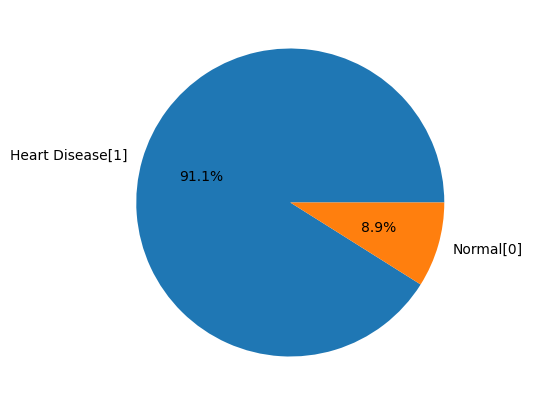

In [18]:
# Normal and Heart Disease with target column
plt.figure(figsize=(10,5))
plt.pie(df['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

In [19]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
No,25869
Yes,2538


In [20]:
# numerical and categorical features
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])
print('Categorical features:\n', Categorical)
print('Numerical features:\n', Numerical)

Categorical features:
       HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0               No     Yes              No     No          No  Female   
1               No      No              No    Yes          No  Female   
2               No     Yes              No     No          No    Male   
3               No      No              No     No          No  Female   
4               No      No              No     No         Yes  Female   
...            ...     ...             ...    ...         ...     ...   
28557           No     Yes              No     No         Yes    Male   
28558           No     Yes              No     No          No    Male   
28559           No      No              No     No          No  Female   
28560           No      No              No     No          No  Female   
28561           No      No              No     No          No    Male   

       AgeCategory                            Race Diabetic PhysicalActivity  \
0            55-59  

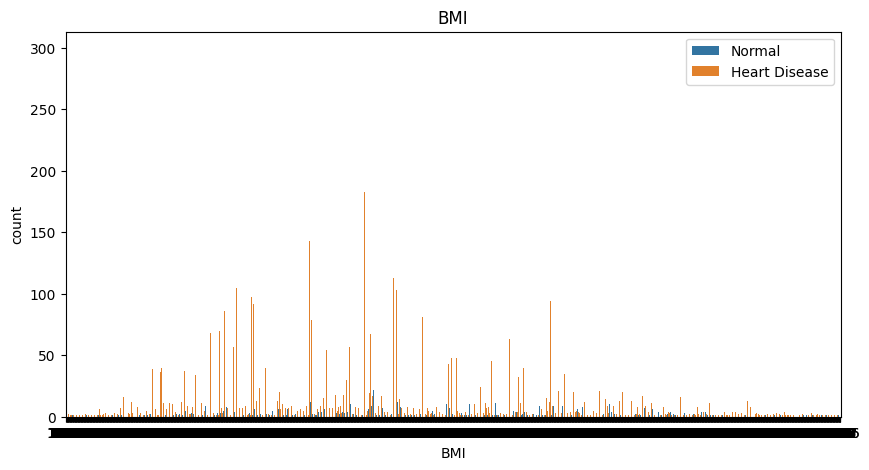

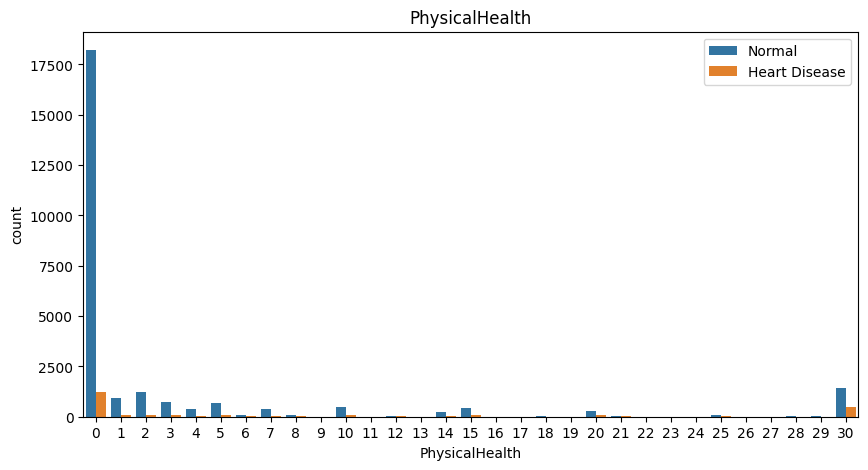

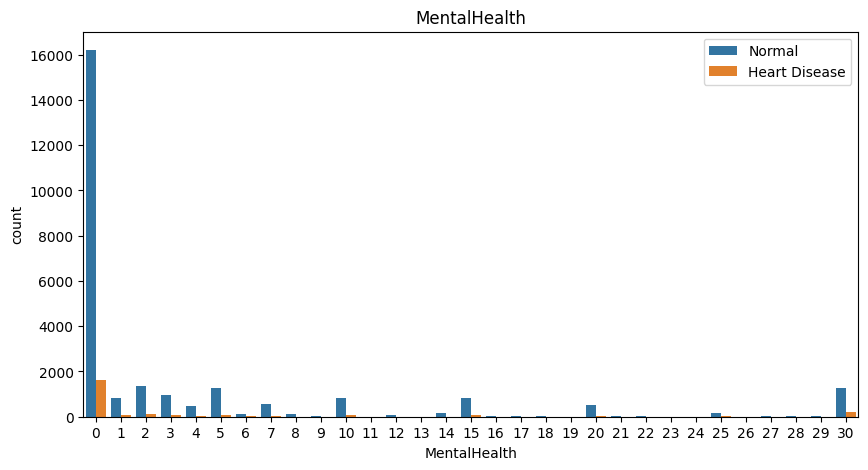

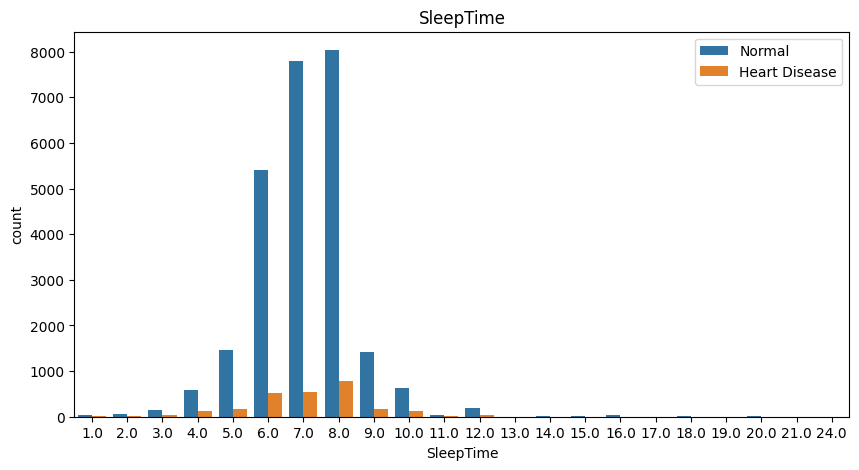

In [21]:
# ploting numerical features with target
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

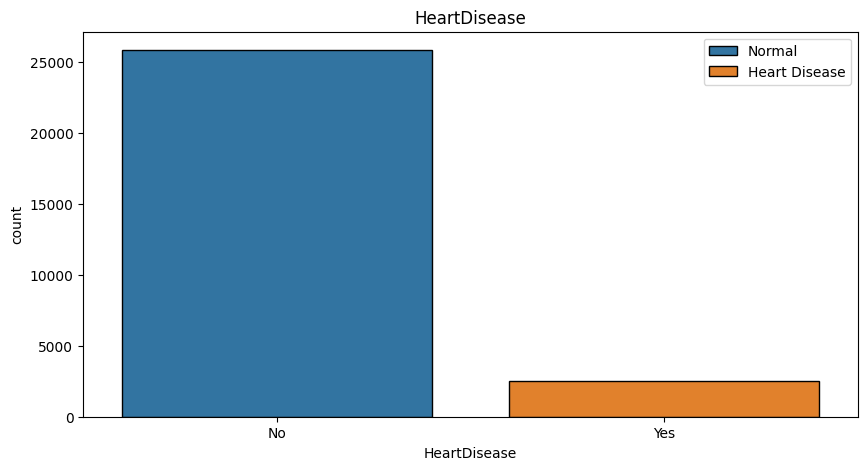

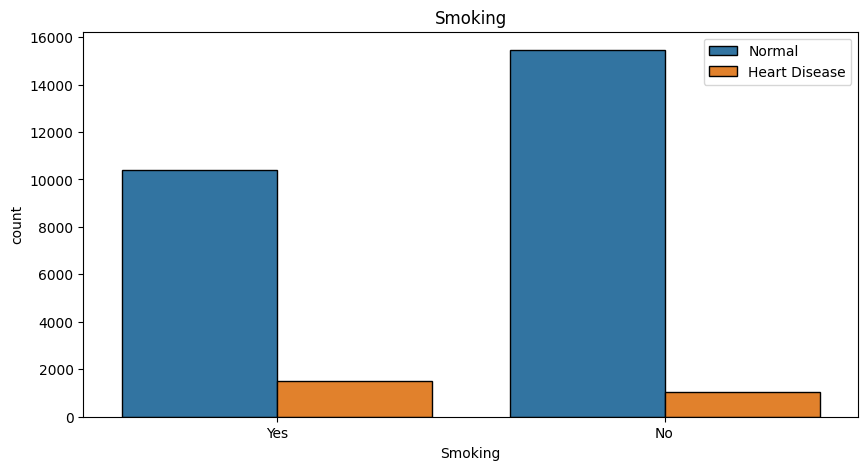

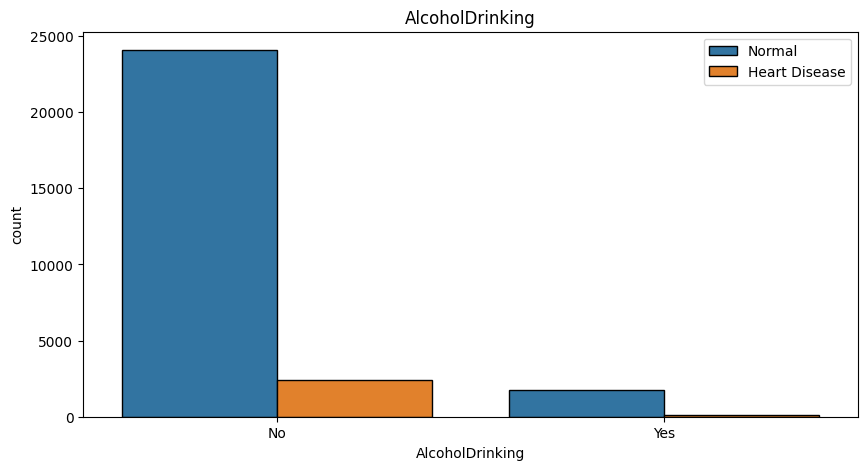

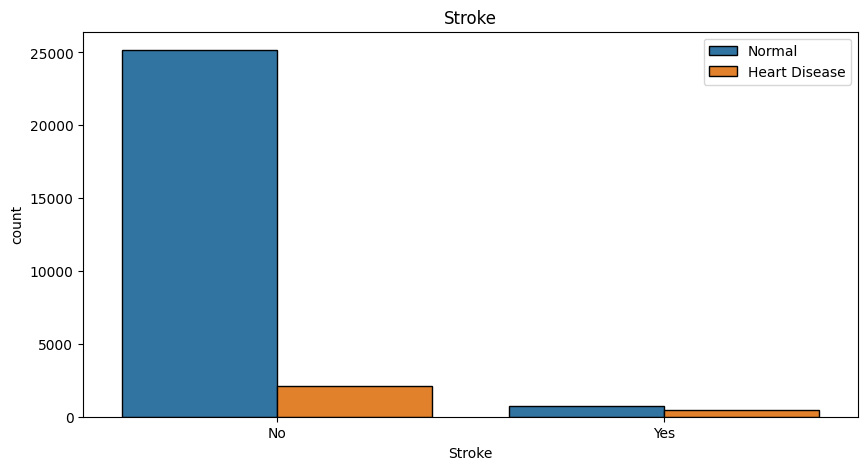

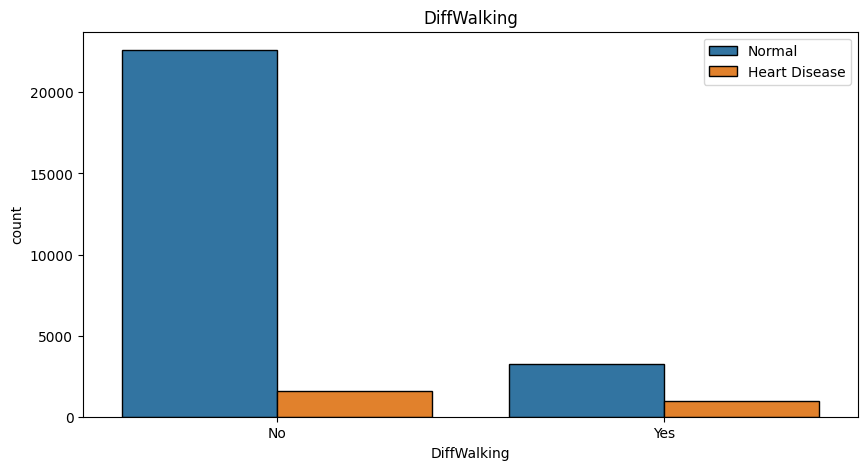

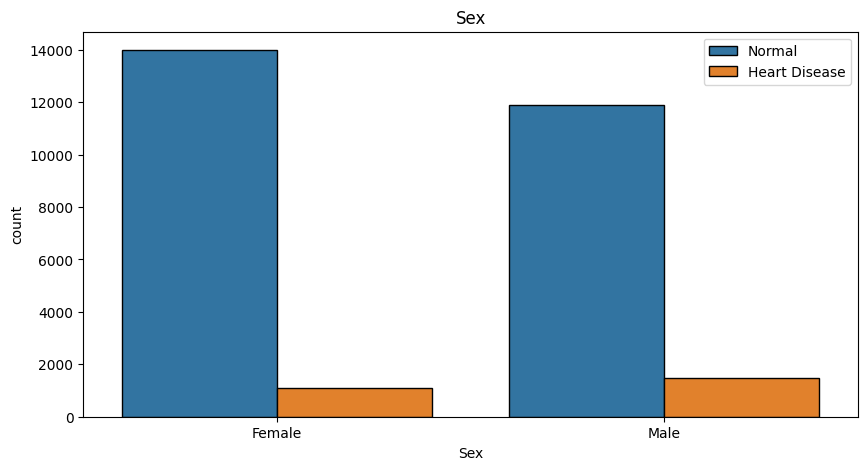

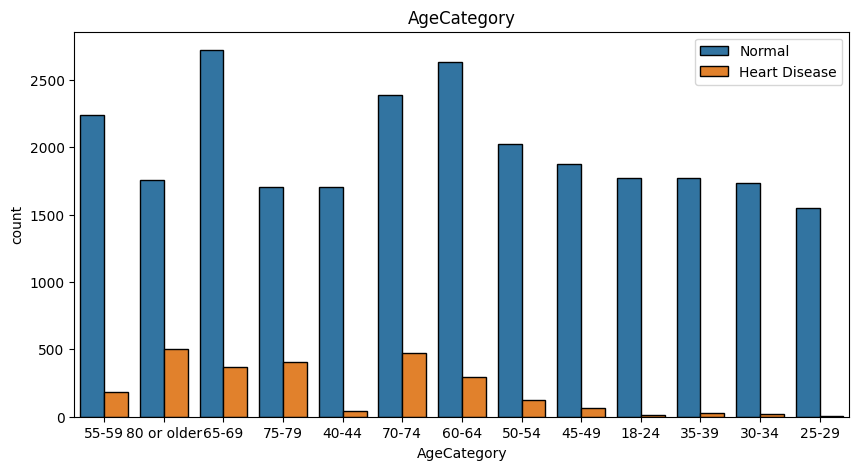

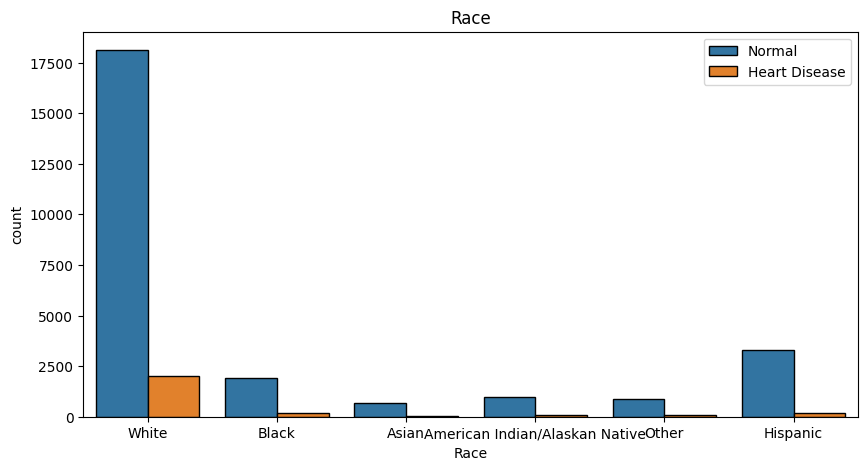

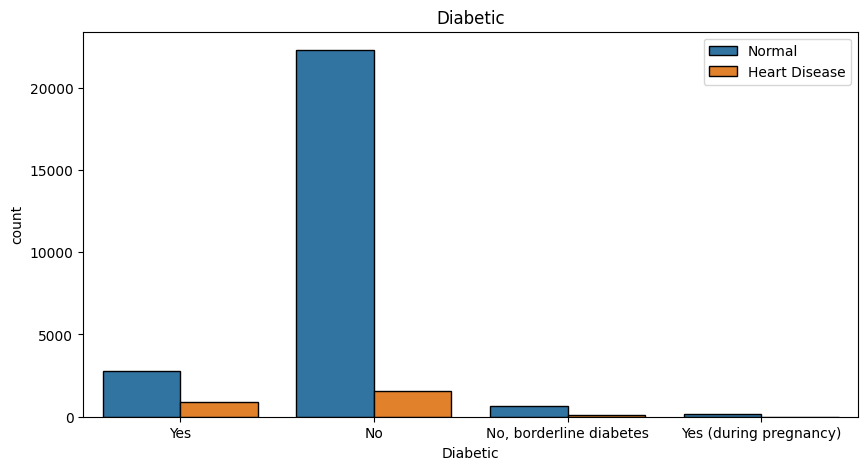

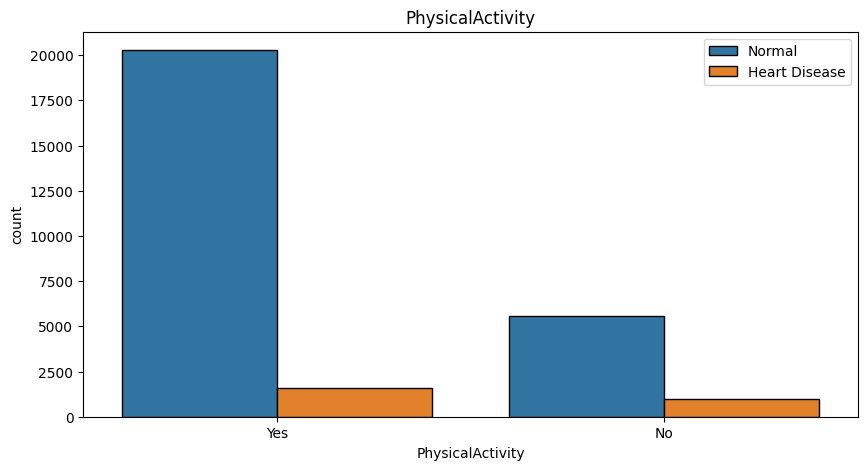

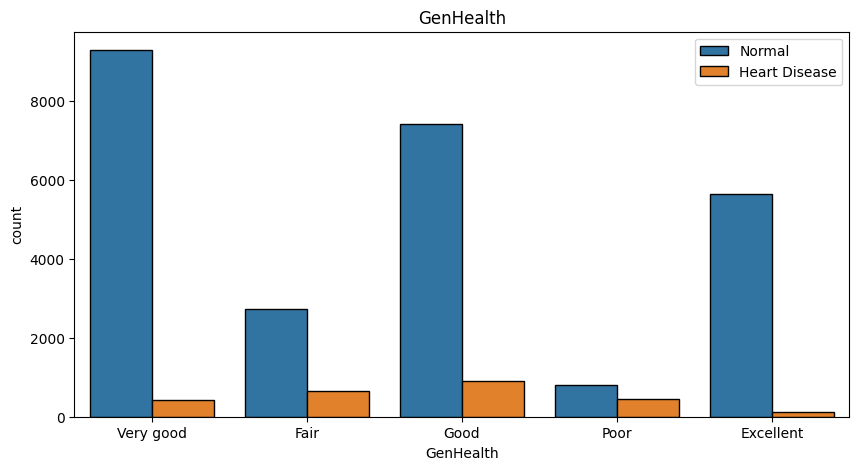

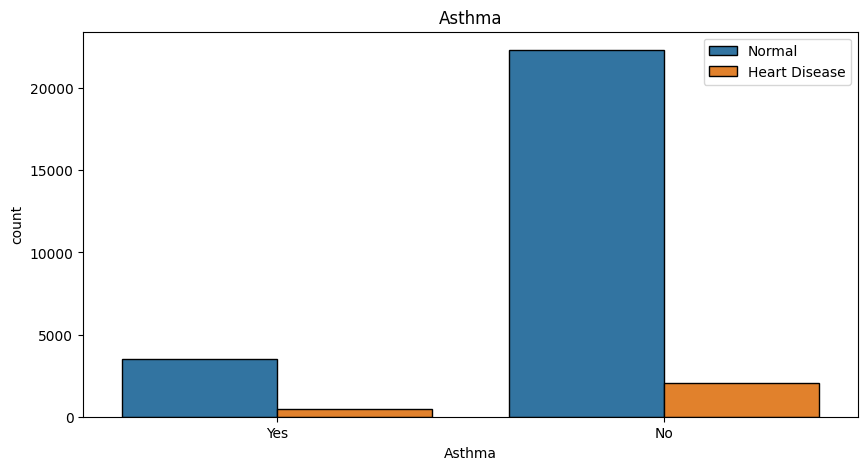

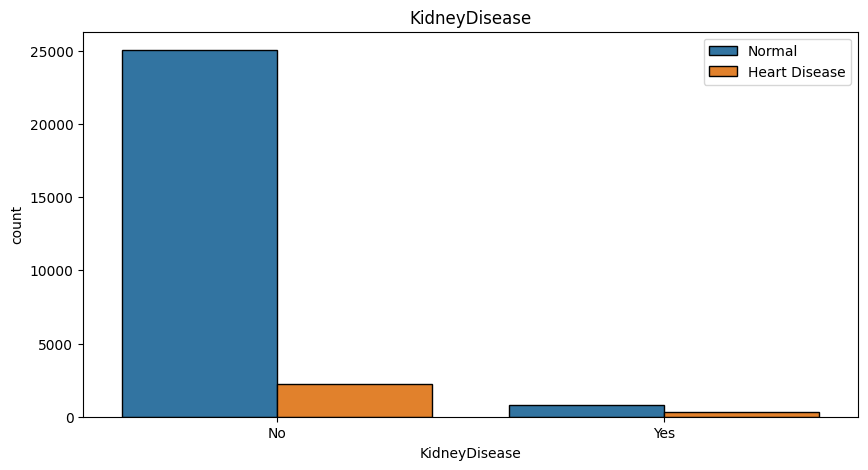

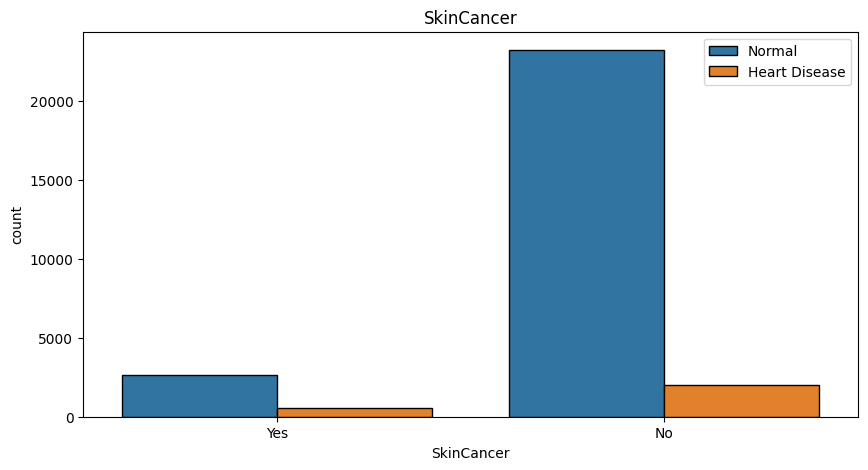

In [22]:
#ploting categorical features with target
for i in Categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

##Preprocessing dataset

In [23]:
label_encoder = LabelEncoder()
df['HeartDisease_encoded'] = label_encoder.fit_transform(df['HeartDisease'])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_encoded
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0


In [24]:
df.drop('HeartDisease', axis=1, inplace=True)
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_encoded
0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0


In [25]:
for feature in continuos_col:
    categories = df[feature].unique()
    samples = [df[df[feature] == category]['HeartDisease_encoded'] for category in categories]
    f_statistic, p_value = f_oneway(*samples)

    print(f"ANOVA for {feature}:")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)
    print()
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between the variables.")
else:
    print("There is no significant relationship between the variables.",Fail_feature.append(feature))


ANOVA for BMI:
F-statistic: 1.3080402461494613
P-value: 3.0906303522746263e-18

ANOVA for PhysicalHealth:
F-statistic: 37.038593338198694
P-value: 3.857074967205084e-210

ANOVA for MentalHealth:
F-statistic: 3.66287631466768
P-value: 5.0932206709937105e-11

ANOVA for SleepTime:
F-statistic: 13.434467863274136
P-value: 2.488036809997048e-47

There is a significant relationship between the variables.


In [26]:
Fail_feature

[]

In [27]:
df.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease_encoded'],
      dtype='object')

In [28]:
update_category_col = df.select_dtypes(include=['object']).columns
category_col

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [29]:
for col in update_category_col:
  print(f'{col}: {df[col].unique()}')

Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['Yes' 'No']


In [30]:
label_encoders = {}  # لتخزين الـ LabelEncoders لكل عمود

binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                  'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # تخزين الـ LabelEncoder لاستخدامه لاحقًا

print(df)

         BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0      16.60        1                0       0               3            30   
1      20.34        0                0       1               0             0   
2      26.58        1                0       0              20            30   
3      24.21        0                0       0               0             0   
4      23.71        0                0       0              28             0   
...      ...      ...              ...     ...             ...           ...   
28557  25.10        1                0       0              20             0   
28558  32.98        1                0       0               0            25   
28559  20.36        0                0       0               0             0   
28560  43.92        0                0       0               0             0   
28561  19.67        0                0       0               4             0   

       DiffWalking  Sex  AgeCategory   

In [31]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_encoded
0,16.60,1,0,0,3,30,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,0
1,20.34,0,0,1,0,0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0,0
2,26.58,1,0,0,20,30,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0,0
3,24.21,0,0,0,0,0,0,0,75-79,White,No,0,Good,6.0,0,0,1,0
4,23.71,0,0,0,28,0,1,0,40-44,White,No,1,Very good,8.0,0,0,0,0


In [32]:
nominal_columns = ['Race', 'Diabetic', 'GenHealth']

encoder = OneHotEncoder(sparse_output=False)


one_hot_encoded = encoder.fit_transform(df[nominal_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(nominal_columns))


df_encoded = pd.concat([df, one_hot_df], axis=1)


df_encoded = df_encoded.drop(nominal_columns, axis=1)
df_encoded.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,55-59,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,80 or older,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,65-69,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75-79,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,40-44,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
age_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}
df_encoded['AgeCategory'] = df_encoded['AgeCategory'].map(age_mapping)

In [34]:
df_encoded.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
len(df_encoded.columns)

30

In [36]:
df_encoded.count()

,0
BMI,28407
Smoking,28407
AlcoholDrinking,28407
Stroke,28407
PhysicalHealth,28407
MentalHealth,28407
DiffWalking,28407
Sex,28407
AgeCategory,28407
PhysicalActivity,28407


In [37]:
df_encoded.describe()


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
count,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,...,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000
mean,28.114766,0.419685,0.066920,0.039849,3.727919,3.996445,0.149400,0.469638,6.589503,0.769317,...,0.708206,0.840004,0.024853,0.128102,0.007041,0.202873,0.119478,0.292393,0.043405,0.341852
std,6.328037,0.493516,0.249888,0.195609,8.290958,7.966006,0.356488,0.499086,3.601039,0.421277,...,0.454596,0.366609,0.155680,0.334209,0.083613,0.402145,0.324355,0.454870,0.203770,0.474339
min,12.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.190000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,10.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,83.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_encoded.rename(columns={'HeartDisease_encoded': 'Heart Failure'}, inplace=True)

In [39]:
df_encoded.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'PhysicalActivity',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Heart Failure',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good'],
      dtype='object')

In [40]:
df_encoded.isnull().sum()

,0
BMI,155
Smoking,155
AlcoholDrinking,155
Stroke,155
PhysicalHealth,155
MentalHealth,155
DiffWalking,155
Sex,155
AgeCategory,155
PhysicalActivity,155


In [41]:
df_encoded.dropna(inplace=True)

In [42]:
df_encoded.duplicated().sum()

73

In [43]:
df_encoded.drop_duplicates(inplace=True)

In [44]:
df_encoded.duplicated().sum()

0

In [45]:
df_encoded.isnull().sum()

,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0
PhysicalActivity,0


##Fit Model

In [46]:
X=df_encoded.drop(columns=["Heart Failure"])
y=df_encoded["Heart Failure"]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print( y_train_balanced.value_counts())

Heart Failure
0.0    20529
1.0     2014
Name: count, dtype: int64
Heart Failure
0.0    20529
1.0    20529
Name: count, dtype: int64


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)


🔍 جاري البحث عن أفضل هايبر باراميترز لـ Logistic Regression ...
✅ أفضل باراميترز لـ Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
🎯 أفضل دقة في التدريب: 0.7614

🔍 جاري البحث عن أفضل هايبر باراميترز لـ Random Forest ...
✅ أفضل باراميترز لـ Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
🎯 أفضل دقة في التدريب: 0.9425

🔍 جاري البحث عن أفضل هايبر باراميترز لـ SVM ...
✅ أفضل باراميترز لـ SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
🎯 أفضل دقة في التدريب: 0.9112

🔍 جاري البحث عن أفضل هايبر باراميترز لـ Gradient Boosting ...
✅ أفضل باراميترز لـ Gradient Boosting: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
🎯 أفضل دقة في التدريب: 0.9397

🔍 جاري البحث عن أفضل هايبر باراميترز لـ K-Nearest Neighbors (KNN) ...
✅ أفضل باراميترز لـ K-Nearest Neighbors (KNN): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
🎯 أفضل دقة في التدريب: 0.9391

🔍 جاري البحث عن أفضل هايبر باراميترز لـ Naïve Bayes ...
✅ أفضل باراميترز لـ Naïve Bayes: {'

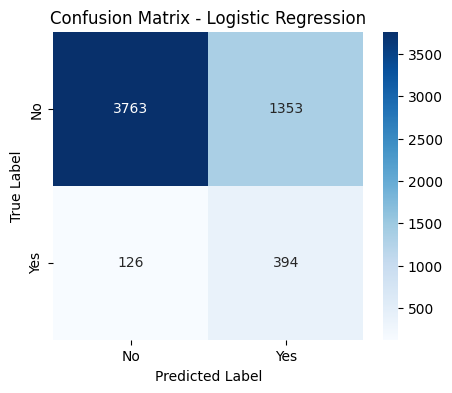


🏆 دقة التدريب لـ Random Forest: 0.9860
🏆 دقة الاختبار لـ Random Forest: 0.9029
📊 تقرير التصنيف:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      5116
         1.0       0.39      0.09      0.15       520

    accuracy                           0.90      5636
   macro avg       0.65      0.54      0.55      5636
weighted avg       0.87      0.90      0.88      5636



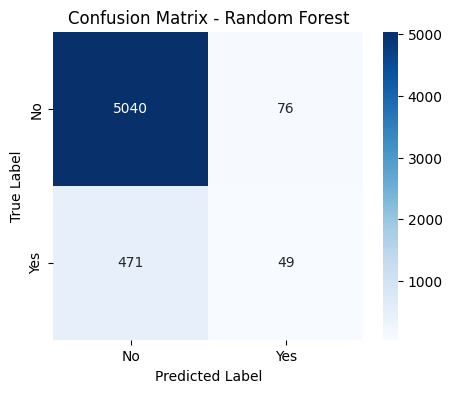


🏆 دقة التدريب لـ SVM: 0.9474
🏆 دقة الاختبار لـ SVM: 0.8895
📊 تقرير التصنيف:
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      5116
         1.0       0.32      0.18      0.23       520

    accuracy                           0.89      5636
   macro avg       0.62      0.57      0.59      5636
weighted avg       0.87      0.89      0.88      5636



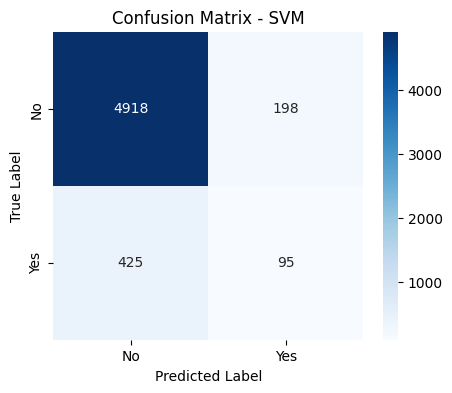


🏆 دقة التدريب لـ Gradient Boosting: 0.9512
🏆 دقة الاختبار لـ Gradient Boosting: 0.9086
📊 تقرير التصنيف:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5116
         1.0       0.52      0.11      0.18       520

    accuracy                           0.91      5636
   macro avg       0.72      0.55      0.57      5636
weighted avg       0.88      0.91      0.88      5636



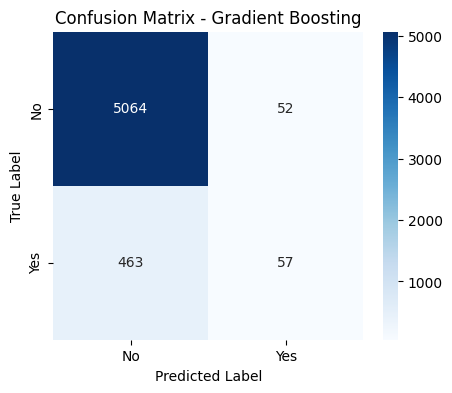


🏆 دقة التدريب لـ K-Nearest Neighbors (KNN): 0.9999
🏆 دقة الاختبار لـ K-Nearest Neighbors (KNN): 0.8579
📊 تقرير التصنيف:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      5116
         1.0       0.24      0.24      0.24       520

    accuracy                           0.86      5636
   macro avg       0.58      0.58      0.58      5636
weighted avg       0.86      0.86      0.86      5636



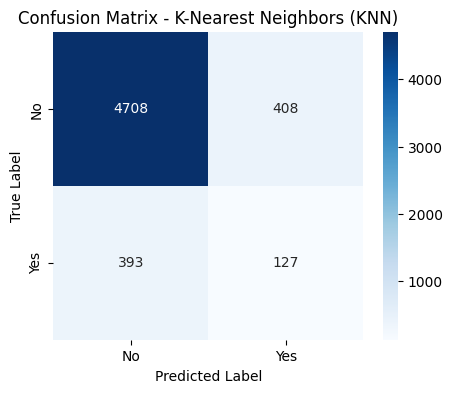


🏆 دقة التدريب لـ Naïve Bayes: 0.7297
🏆 دقة الاختبار لـ Naïve Bayes: 0.6602
📊 تقرير التصنيف:
               precision    recall  f1-score   support

         0.0       0.96      0.65      0.78      5116
         1.0       0.18      0.73      0.28       520

    accuracy                           0.66      5636
   macro avg       0.57      0.69      0.53      5636
weighted avg       0.89      0.66      0.73      5636



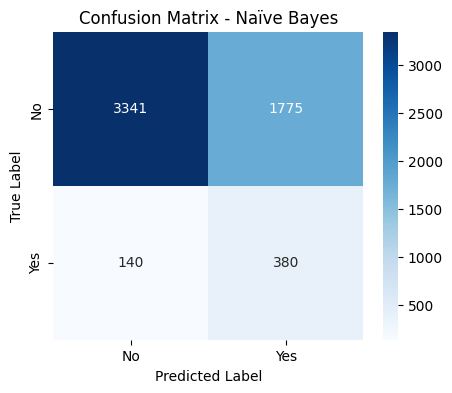

In [50]:
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.3],
            "max_depth": [3, 6, 10]
        }
    },
    "K-Nearest Neighbors (KNN)": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    },
    "Naïve Bayes": {
        "model": GaussianNB(),
        "params": {
            "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
        }
    }
}

# تنفيذ GridSearchCV لكل نموذج
best_models = {}
for name, model_info in param_grids.items():
    print(f"\n🔍 جاري البحث عن أفضل هايبر باراميترز لـ {name} ...")

    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=3, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_balanced)

    # حفظ أفضل نموذج وأفضل باراميترز
    best_models[name] = grid_search.best_estimator_

    print(f"✅ أفضل باراميترز لـ {name}: {grid_search.best_params_}")
    print(f"🎯 أفضل دقة في التدريب: {grid_search.best_score_:.4f}")

# 📌 اختبار النماذج الأفضل على بيانات الاختبار
for name, model in best_models.items():
    y_train_pred = model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train_balanced, y_train_pred)

    y_pred = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_pred)

    print(f"\n🏆 دقة التدريب لـ {name}: {train_acc:.4f}")
    print(f"🏆 دقة الاختبار لـ {name}: {test_acc:.4f}")

    # عرض تقرير الأداء
    print("📊 تقرير التصنيف:\n", classification_report(y_test, y_pred))

    # رسم مصفوفة الالتباس
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


✅ دقة التدريب: 0.9529
✅ دقة الاختبار: 0.9045
📊 تقرير الأداء:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5116
         1.0       0.43      0.10      0.16       520

    accuracy                           0.90      5636
   macro avg       0.67      0.54      0.56      5636
weighted avg       0.87      0.90      0.88      5636



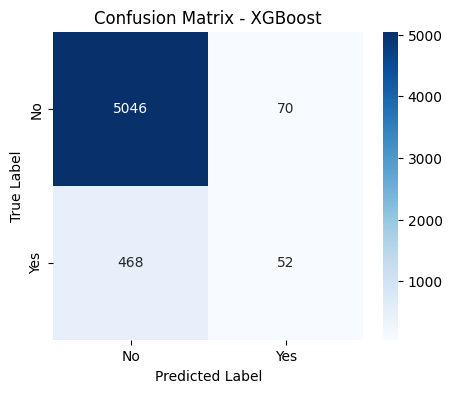

In [51]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# 📌 تدريب النموذج
model.fit(X_train_scaled, y_train_balanced)

# 📌 التنبؤ
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 📌 حساب الدقة
train_acc = accuracy_score(y_train_balanced, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# 📌 طباعة النتائج
print(f"✅ دقة التدريب: {train_acc:.4f}")
print(f"✅ دقة الاختبار: {test_acc:.4f}")
print("📊 تقرير الأداء:\n", classification_report(y_test, y_test_pred))

# 📌 رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [69]:
modelNN = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1, activation='sigmoid')  # الإخراج الثنائي
])

# 📌 **إعداد الموديل**
modelNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
history = modelNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9084 - loss: 0.3355 - val_accuracy: 0.9077 - val_loss: 0.2882
Epoch 2/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9148 - loss: 0.2787 - val_accuracy: 0.9077 - val_loss: 0.2694
Epoch 3/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9103 - loss: 0.2727 - val_accuracy: 0.9077 - val_loss: 0.2725
Epoch 4/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9105 - loss: 0.2595 - val_accuracy: 0.9077 - val_loss: 0.2601
Epoch 5/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9069 - loss: 0.2686 - val_accuracy: 0.9077 - val_loss: 0.2567
Epoch 6/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9110 - loss: 0.2550 - val_accuracy: 0.9081 - val_loss: 0.2573
Epoch 7/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9129 - loss: 0.2501 - val_accuracy: 0.9083 - val_loss: 0.2569
Epoch 8/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9081 - loss: 0.2592 - val_accuracy: 0.

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


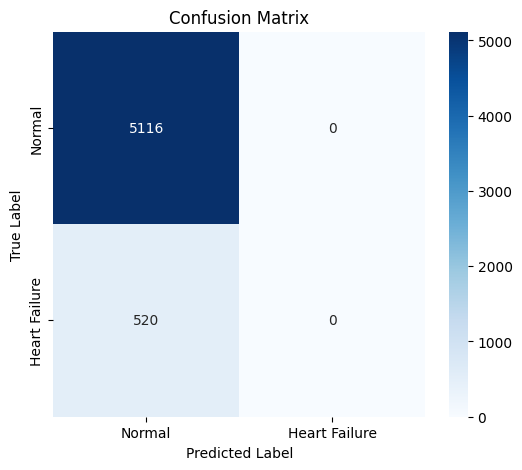

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      5116
         1.0       0.00      0.00      0.00       520

    accuracy                           0.91      5636
   macro avg       0.45      0.50      0.48      5636
weighted avg       0.82      0.91      0.86      5636



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
# 📌 **تقييم الموديل**
y_pred_probs = model.predict(X_test)  # القيم التنبؤية الاحتمالية
y_pred = (y_pred_probs > 0.5).astype(int)  # تحويل الاحتمالات إلى 0 أو 1

# 📌 **عرض Confusion Matrix**
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Heart Failure"], yticklabels=["Normal", "Heart Failure"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📌 **طباعة Classification Report**
print("📊 Classification Report:\n", classification_report(y_test, y_pred))


In [59]:
# 📌 إنشاء أفضل موديل Gradient Boosting
best_params = {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
modelGB = GradientBoostingClassifier(**best_params)

# 📌 تدريب الموديل
modelGB.fit(X_train, y_train)

# 📌 اختبار الموديل
y_pred = modelGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ دقة الاختبار: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

✅ دقة الاختبار: 0.9074
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5116
         1.0       0.49      0.11      0.18       520

    accuracy                           0.91      5636
   macro avg       0.70      0.55      0.57      5636
weighted avg       0.88      0.91      0.88      5636



In [60]:
with open("heart_failure_modelGB.pkl", "wb") as file:
    pickle.dump(modelGB, file)

print("🚀 النموذج تم حفظه بنجاح في heart_failure_model.pkl")

🚀 النموذج تم حفظه بنجاح في heart_failure_model.pkl


In [55]:
with open("label_encoders.pkl", "wb") as le_file:
    pickle.dump(label_encoders, le_file)

with open("one_hot_encoder.pkl", "wb") as ohe_file:
    pickle.dump(encoder, ohe_file) # Changed 'one_hot_encoder' to 'encoder'

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

with open("heart_failure_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("✅ تم حفظ المحولات والنموذج بنجاح!")

✅ تم حفظ المحولات والنموذج بنجاح!


In [56]:
with open("/content/label_encoders.pkl", "rb") as le_file:
    label_encoders = pickle.load(le_file)  # تأكد أن المحمل هو قاموس وليس كائن واحد

with open("/content/one_hot_encoder.pkl", "rb") as ohe_file:
    one_hot_encoder = pickle.load(ohe_file)

with open("/content/scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

with open("/content/heart_failure_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# --- خيارات الإدخال الصحيحة ---
valid_options = {
    'Smoking': ['Yes', 'No'],
    'AlcoholDrinking': ['Yes', 'No'],
    'Stroke': ['Yes', 'No'],
    'DiffWalking': ['Yes', 'No'],
    'Sex': ['Male', 'Female'],
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
                    '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
    'Race': ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic'],
    'Diabetic': ['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
    'PhysicalActivity': ['Yes', 'No'],
    'GenHealth': ['Very good', 'Fair', 'Good', 'Poor', 'Excellent'],
    'Asthma': ['Yes', 'No'],
    'KidneyDisease': ['Yes', 'No'],
    'SkinCancer': ['Yes', 'No']
}

# --- جمع بيانات المستخدم ---
def collect_user_input():
    print("🔹 يرجى إدخال البيانات التالية:")
    user_data = {
        'BMI': float(input("🔸 BMI (مثال: 25.4): ")),
        'Smoking': input("🔸 هل تدخن؟ (Yes/No): ").strip(),
        'AlcoholDrinking': input("🔸 هل تشرب الكحول؟ (Yes/No): ").strip(),
        'Stroke': input("🔸 هل أصبت بسكتة دماغية؟ (Yes/No): ").strip(),
        'PhysicalHealth': float(input("🔸 صحتك الجسدية (0-30 يومًا): ")),
        'MentalHealth': float(input("🔸 صحتك العقلية (0-30 يومًا): ")),
        'DiffWalking': input("🔸 هل لديك صعوبة في المشي؟ (Yes/No): ").strip(),
        'Sex': input("🔸 الجنس (Male/Female): ").strip(),
        'AgeCategory': input("🔸 الفئة العمرية (مثال: 55-59): ").strip(),
        'Race': input("🔸 العرق (مثال: White): ").strip(),
        'Diabetic': input("🔸 هل أنت مصاب بالسكري؟ (Yes/No/...): ").strip(),
        'PhysicalActivity': input("🔸 هل تمارس الرياضة؟ (Yes/No): ").strip(),
        'GenHealth': input("🔸 حالتك الصحية العامة (Good/...): ").strip(),
        'SleepTime': float(input("🔸 عدد ساعات النوم يوميًا (مثال: 7): ")),
        'Asthma': input("🔸 هل لديك ربو؟ (Yes/No): ").strip(),
        'KidneyDisease': input("🔸 هل لديك مرض بالكلى؟ (Yes/No): ").strip(),
        'SkinCancer': input("🔸 هل أصبت بسرطان الجلد؟ (Yes/No): ").strip()
    }
    return pd.DataFrame([user_data])

# --- المعالجة المسبقة والتنبؤ ---
def preprocess_and_predict(user_input):
    # 🔹 تحويل الفئة العمرية إلى أرقام
    age_mapping = {age: i for i, age in enumerate(valid_options['AgeCategory'])}
    user_input['AgeCategory'] = user_input['AgeCategory'].map(age_mapping)

    # 🔹 التحقق من وجود جميع القيم في `label_encoders`
    categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                           'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

    for col in categorical_columns:
        if col in label_encoders:
            user_input[col] = label_encoders[col].transform(user_input[col])

    # 🔹 التشفير الأحادي (One-Hot Encoding)
    nominal_columns = ['Race', 'Diabetic', 'GenHealth']
    one_hot_encoded = one_hot_encoder.transform(user_input[nominal_columns])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(nominal_columns))

    # 🔹 دمج البيانات المعالجة
    user_input = pd.concat([user_input, one_hot_df], axis=1).drop(nominal_columns, axis=1)

    # 🔹 تطبيق التحجيم القياسي
    user_input_scaled = scaler.transform(user_input)

    # 🔹 التنبؤ
    prediction = model.predict(user_input_scaled)

    return "Yes" if prediction[0] == 1 else "No"

# --- تشغيل البرنامج ---
if __name__ == "__main__":
    user_input = collect_user_input()
    prediction = preprocess_and_predict(user_input)
    print(f"\n🩺 نتيجة التنبؤ بفشل القلب: {prediction} ✅" if prediction == "Yes" else "❌ لا يوجد خطر فشل القلب.")


🔹 يرجى إدخال البيانات التالية:
🔸 BMI (مثال: 25.4): 25
🔸 هل تدخن؟ (Yes/No): Yes
🔸 هل تشرب الكحول؟ (Yes/No): Yes
🔸 هل أصبت بسكتة دماغية؟ (Yes/No): Yes
🔸 صحتك الجسدية (0-30 يومًا): 30
🔸 صحتك العقلية (0-30 يومًا): 30
🔸 هل لديك صعوبة في المشي؟ (Yes/No): Yes
🔸 الجنس (Male/Female): Male
🔸 الفئة العمرية (مثال: 55-59): 55-59
🔸 العرق (مثال: White): White
🔸 هل أنت مصاب بالسكري؟ (Yes/No/...): Yes
🔸 هل تمارس الرياضة؟ (Yes/No): Yes
🔸 حالتك الصحية العامة (Good/...): Good
🔸 عدد ساعات النوم يوميًا (مثال: 7): 8
🔸 هل لديك ربو؟ (Yes/No): Yes
🔸 هل لديك مرض بالكلى؟ (Yes/No): Yes
🔸 هل أصبت بسرطان الجلد؟ (Yes/No): Yes
❌ لا يوجد خطر فشل القلب.


In [61]:
with open("/content/label_encoders.pkl", "rb") as le_file:
    label_encoders = pickle.load(le_file)  # تأكد أن المحمل هو قاموس وليس كائن واحد

with open("/content/one_hot_encoder.pkl", "rb") as ohe_file:
    one_hot_encoder = pickle.load(ohe_file)

with open("/content/scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

with open("/content/heart_failure_modelGB.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# --- خيارات الإدخال الصحيحة ---
valid_options = {
    'Smoking': ['Yes', 'No'],
    'AlcoholDrinking': ['Yes', 'No'],
    'Stroke': ['Yes', 'No'],
    'DiffWalking': ['Yes', 'No'],
    'Sex': ['Male', 'Female'],
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
                    '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
    'Race': ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic'],
    'Diabetic': ['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
    'PhysicalActivity': ['Yes', 'No'],
    'GenHealth': ['Very good', 'Fair', 'Good', 'Poor', 'Excellent'],
    'Asthma': ['Yes', 'No'],
    'KidneyDisease': ['Yes', 'No'],
    'SkinCancer': ['Yes', 'No']
}

# --- جمع بيانات المستخدم ---
def collect_user_input():
    print("🔹 يرجى إدخال البيانات التالية:")
    user_data = {
        'BMI': float(input("🔸 BMI (مثال: 25.4): ")),
        'Smoking': input("🔸 هل تدخن؟ (Yes/No): ").strip(),
        'AlcoholDrinking': input("🔸 هل تشرب الكحول؟ (Yes/No): ").strip(),
        'Stroke': input("🔸 هل أصبت بسكتة دماغية؟ (Yes/No): ").strip(),
        'PhysicalHealth': float(input("🔸 صحتك الجسدية (0-30 يومًا): ")),
        'MentalHealth': float(input("🔸 صحتك العقلية (0-30 يومًا): ")),
        'DiffWalking': input("🔸 هل لديك صعوبة في المشي؟ (Yes/No): ").strip(),
        'Sex': input("🔸 الجنس (Male/Female): ").strip(),
        'AgeCategory': input("🔸 الفئة العمرية (مثال: 55-59): ").strip(),
        'Race': input("🔸 العرق (مثال: White): ").strip(),
        'Diabetic': input("🔸 هل أنت مصاب بالسكري؟ (Yes/No/...): ").strip(),
        'PhysicalActivity': input("🔸 هل تمارس الرياضة؟ (Yes/No): ").strip(),
        'GenHealth': input("🔸 حالتك الصحية العامة (Good/...): ").strip(),
        'SleepTime': float(input("🔸 عدد ساعات النوم يوميًا (مثال: 7): ")),
        'Asthma': input("🔸 هل لديك ربو؟ (Yes/No): ").strip(),
        'KidneyDisease': input("🔸 هل لديك مرض بالكلى؟ (Yes/No): ").strip(),
        'SkinCancer': input("🔸 هل أصبت بسرطان الجلد؟ (Yes/No): ").strip()
    }
    return pd.DataFrame([user_data])

# --- المعالجة المسبقة والتنبؤ ---
def preprocess_and_predict(user_input):
    # 🔹 تحويل الفئة العمرية إلى أرقام
    age_mapping = {age: i for i, age in enumerate(valid_options['AgeCategory'])}
    user_input['AgeCategory'] = user_input['AgeCategory'].map(age_mapping)

    # 🔹 التحقق من وجود جميع القيم في `label_encoders`
    categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                           'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

    for col in categorical_columns:
        if col in label_encoders:
            user_input[col] = label_encoders[col].transform(user_input[col])

    # 🔹 التشفير الأحادي (One-Hot Encoding)
    nominal_columns = ['Race', 'Diabetic', 'GenHealth']
    one_hot_encoded = one_hot_encoder.transform(user_input[nominal_columns])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(nominal_columns))

    # 🔹 دمج البيانات المعالجة
    user_input = pd.concat([user_input, one_hot_df], axis=1).drop(nominal_columns, axis=1)

    # 🔹 تطبيق التحجيم القياسي
    user_input_scaled = scaler.transform(user_input)

    # 🔹 التنبؤ
    prediction = model.predict(user_input_scaled)

    return "Yes" if prediction[0] == 1 else "No"

# --- تشغيل البرنامج ---
if __name__ == "__main__":
    user_input = collect_user_input()
    prediction = preprocess_and_predict(user_input)
    print(f"\n🩺 نتيجة التنبؤ بفشل القلب: {prediction} ✅" if prediction == "Yes" else "❌ لا يوجد خطر فشل القلب.")


🔹 يرجى إدخال البيانات التالية:
🔸 BMI (مثال: 25.4): 25
🔸 هل تدخن؟ (Yes/No): Yes
🔸 هل تشرب الكحول؟ (Yes/No): Yes
🔸 هل أصبت بسكتة دماغية؟ (Yes/No): Yes
🔸 صحتك الجسدية (0-30 يومًا): 30
🔸 صحتك العقلية (0-30 يومًا): 30
🔸 هل لديك صعوبة في المشي؟ (Yes/No): Yes
🔸 الجنس (Male/Female): Male
🔸 الفئة العمرية (مثال: 55-59): 55-59
🔸 العرق (مثال: White): White
🔸 هل أنت مصاب بالسكري؟ (Yes/No/...): Yes
🔸 هل تمارس الرياضة؟ (Yes/No): Yes
🔸 حالتك الصحية العامة (Good/...): Good
🔸 عدد ساعات النوم يوميًا (مثال: 7): 9
🔸 هل لديك ربو؟ (Yes/No): Yes
🔸 هل لديك مرض بالكلى؟ (Yes/No): Yes
🔸 هل أصبت بسرطان الجلد؟ (Yes/No): Yes
❌ لا يوجد خطر فشل القلب.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [62]:
# --- Load Preprocessors and Model ---
with open("/content/label_encoders.pkl", "rb") as le_file:
    label_encoder = pickle.load(le_file)

with open("/content/one_hot_encoder.pkl", "rb") as ohe_file:
    one_hot_encoder = pickle.load(ohe_file)

with open("/content/scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

with open("/content/heart_failure_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)
with open("/content/heart_failure_modelGB.pkl", "rb") as model_file:
    model = pickle.load(model_file)